Reuse Categories

Found 34 files in C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data
0.8377045201800001 0 all good prods
0 C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data\perf_0.npy [0.9515 1.     0.9522 0.9246] 0.8377045201800001 network 5
0.6839551088372857 3 all good prods
3 C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data\perf_11.npy [0.8791 0.9843 0.9473 0.8344] 0.6839551088372857 network 5
0.7960897507252644 4 all good prods
4 C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data\perf_12.npy [0.9652 0.9993 0.9099 0.9071] 0.7960897507252644 network 5
0.8813359117080001 5 all good prods
5 C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data\perf_13.npy [0.9838 1.     0.9639 0.9294] 0.8813359117080001 network 5
0.392830080424 7 all good prods
7 C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequent

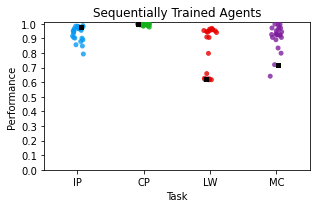

In [5]:
##################################################
# figure 3
# connected swarm of individual fitness of multifunc ensemble
##################################################
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

dir = "C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data"
def connected_swarms(dir):
    plt.figure(figsize=[4.5, 3])

    # load data
    files = glob.glob(os.path.join(dir, "perf_*.npy"))
    files.sort()
    print("Found {} files in {}".format(len(files), dir))
    dat = []
    all_fits = []
    best_fits = []
    count = 0
    for i, file in enumerate(files):
        fits = np.load(file)
        #fits = [fits[0],fits[1]]
        fits = fits**(1/4)
        # if np.prod(fits) > 0.8:
        #prod_list = []
        if np.prod(fits) >= 0.0:
            count += 1
            fits = np.round(fits, decimals=4)
            all_fits.append(fits)
            #prod_list.append(np.prod(fits))
            print(np.prod(fits),i,'all good prods')
            
            if "perf_5.npy" in file:
                best_fits.append(["IP", fits[0], i])
                best_fits.append(["CP", fits[1], i])
                #best_fits.append(["MC", fits[1], i])
                best_fits.append(["LW", fits[2], i])
                best_fits.append(["MC", fits[3], i])
            print(i, file, fits, np.prod(fits), 'network 5')
            
            dat.append(["IP", fits[0], i])
            dat.append(["CP", fits[1], i])
            #dat.append(["MC", fits[1], i])
            dat.append(["LW", fits[2], i])
            dat.append(["MC", fits[3], i])
    print("Number of networks under considertaion ", count)
    all_fits = np.array(all_fits)
    #print(np.shape(all_fits), np.min(all_fits,0), np.argmin(all_fits, 0), np.max(all_fits, 0), np.max(np.prod(all_fits,1)))
    #print(best_fits)

    # make DataFrame and plot
    df = pd.DataFrame(dat, columns=["Task", "Performance", "network_id"])
    ax = sns.stripplot(
        x="Task",
        y="Performance",
        # hue="network_id",
        data=df,
        alpha=0.8,
        palette={"IP": "xkcd:azure", "CP": "xkcd:green", "LW":"xkcd:red", "MC": "xKcd:purple"},
    )
    # ax.legend_.remove()
    
    # make DataFram and plot best
    df = pd.DataFrame(best_fits, columns=["Task", "Performance", "network_id"])
    #print(df)
    ax = sns.stripplot(
        x="Task",
        y="Performance",
        data=df,
        # palette={"IP": "xkcd:tomato", "CP": "xkcd:azure", "LW": "xkcd:teal green"},
        palette={"IP": "k", "CP": "k", "LW":"k","MC":"k"},
        marker="s",
    )
    # ax.set_yticks(ax.get_yticks()[::5])
    
    """
    # plot connecting lines
    x1, y1 = np.array(ax.collections[0].get_offsets()).T
    x2, y2 = np.array(ax.collections[1].get_offsets()).T
    x3, y3 = np.array(ax.collections[2].get_offsets()).T
    for xi, xj, xk, yi, yj, yk in zip(x1, x2, x3, y1, y2, y3):
        if yi == np.max(y1):  # best of the best
            print("Max == ", yi, yi * yj * yk)
            plt.plot([xi, xj], [yi, yj], "black")
            plt.plot([xj, xk], [yj, yk], "black")
        else:
            plt.plot([xi, xj], [yi, yj], "gray", alpha=0.3)
            plt.plot([xj, xk], [yj, yk], "gray", alpha=0.3)
    """

    plt.ylim([0.0, 1.01])
    plt.yticks(np.arange(0.0, 1.01, 0.1))
    plt.title('Sequentially Trained Agents')
    plt.tight_layout()
    plt.savefig("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Figures/ind_task_fitness.png")
    plt.show()


connected_swarms(dir)

In [2]:
##################################################
# figure 5
# Lesion analysis
##################################################
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns


def plot_lesion_analysis():
    """
    plt.figure(figsize=[5, 5])

    #plt.subplot2grid([1, 3], [0, 0])
 
    """
    dir = "C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/4T_2x5/Data/"
    files = glob.glob(os.path.join(dir, "perf_*.npy"))
    #print(files)
    files.sort()

    all_categs = []
    all_counts = []
    
    for i, file in enumerate(files):
        fits = np.load(file)
        # if np.prod(fits) > 0.8:
        fits = fits**(1/4)
        if np.min(fits) > 0.0:
            ind = file.split("/")[-1].split(".")[-2].split("_")[-1]
            ipp = np.load("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/4T_2x5/Data/lesions_IP_" + str(ind) + ".npy") #10 values, one for each neuron in a circuit
            cpp = np.load("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/4T_2x5/Data/lesions_CP_" + str(ind) + ".npy")
            lwp = np.load("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/4T_2x5/Data/lesions_LW_" + str(ind) + ".npy")
            mcp = np.load("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/4T_2x5/Data/lesions_MC_" + str(ind) + ".npy")

            # Stats on neurons for Ablations
            
            Threshold = 0.85
            count = np.zeros(16)
            for (ip_neuron, cp_neuron, lw_neuron, mc_neuron) in zip(ipp, cpp, lwp, mcp):
                if (
                    ip_neuron > Threshold and cp_neuron > Threshold and lw_neuron > Threshold and mc_neuron > Threshold
                ):  # no task neurons
                    count[0] += 1
                if (
                    ip_neuron <= Threshold and cp_neuron > Threshold and lw_neuron > Threshold and mc_neuron > Threshold
                ):  # ip task neurons
                    count[1] += 1
                if (
                    ip_neuron > Threshold and cp_neuron <= Threshold and lw_neuron > Threshold and mc_neuron > Threshold
                ):  # cp task neurons
                    count[2] += 1
                if (
                    ip_neuron > Threshold and cp_neuron > Threshold and lw_neuron <= Threshold and mc_neuron > Threshold
                ):  # lw task neurons
                    count[3] += 1
                if (
                    ip_neuron > Threshold and cp_neuron > Threshold and lw_neuron > Threshold and mc_neuron <= Threshold
                ):  # mc task neurons
                    count[4] += 1
                if (
                    ip_neuron <= Threshold and cp_neuron <= Threshold and lw_neuron > Threshold and mc_neuron > Threshold
                ):  # ip and cp
                    count[5] += 1
                if (
                    ip_neuron <= Threshold and cp_neuron > Threshold and lw_neuron <= Threshold and mc_neuron > Threshold
                ):  # ip and lw
                    count[6] += 1
                if (
                    ip_neuron <= Threshold and cp_neuron > Threshold and lw_neuron > Threshold and mc_neuron <= Threshold
                ):  # ip and mc
                    count[7] += 1
                if (
                    ip_neuron > Threshold and cp_neuron <= Threshold and lw_neuron <= Threshold and mc_neuron > Threshold
                ):  #cp and lw
                    count[8] += 1
                if (
                    ip_neuron > Threshold and cp_neuron <= Threshold and lw_neuron > Threshold and mc_neuron <= Threshold
                ):  #cp and mc
                    count[9] += 1
                if (
                    ip_neuron > Threshold and cp_neuron > Threshold and lw_neuron <= Threshold and mc_neuron <= Threshold
                ):  #lw and mc
                    count[10] += 1
                if ( 
                    ip_neuron <= Threshold and cp_neuron <= Threshold and lw_neuron <= Threshold and mc_neuron > Threshold
                ): #ip, cp, lw
                    count[11] += 1
                if ( 
                    ip_neuron <= Threshold and cp_neuron <= Threshold and lw_neuron > Threshold and mc_neuron <= Threshold
                ): #ip, cp, mc
                    count[12] += 1
                if (
                    ip_neuron <= Threshold and cp_neuron > Threshold and lw_neuron <= Threshold and mc_neuron <= Threshold
                ): #ip, lw, mc
                    count[13] += 1
                if (
                    ip_neuron > Threshold and cp_neuron <= Threshold and lw_neuron <= Threshold and mc_neuron <= Threshold
                ): #cp, lw, mc
                    count[14] += 1
                if (
                    ip_neuron <=  Threshold and cp_neuron <= Threshold and lw_neuron <= Threshold and mc_neuron <= Threshold
                ):  #all 
                    count[15] += 1
                

            # making it dataframe ready
            
            all_counts.append(count) #count is a 1x15 array for each agent. All_counts is 15xensemble size 
            np.save("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/4T_2x5/Data"+"/NEWSTATS_" + str(i) + ".npy",count)
            #all categories: reuse and specialization
            categs = ["None","IP","CP","LW","MC","IP+CP","IP+LW","IP+MC","CP+LW","CP+MC","LW+MC","IP+CP+LW","IP+CP+MC","IP+LW+MC","CP+LW+MC","All"]
            #2-neuron reuse categs:
            #5,6,7,8,9,10
            #3-neuron reuse categs:
            #11,12,13,14
            #4-neuron reuse categs: 15
            for cg, ct in zip(categs, count): #15 categories, 15 slots in count, all_categs keeps track of categories for each agent
                all_categs.append([cg, ct, i])
    #print(all_counts)
    #Pairwise data
    #ip_inv = []
    #cp_inv = []
    #lw_inv = []
    mc_inv = []
    #ip_cp = []
    #ip_lw = []
    ip_mc = []
    #ip_mc_lab = []
    #cp_lw = []
    cp_mc = []
    #cp_mc_lab = []
    lw_mc = []
    ip_cp_mc = []
    ip_lw_mc = []
    cp_lw_mc = []

    all_tasks = []
    no_tasks = []
    task_labels = []
    most_pop = []
    
    np.save("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data"+"/ALL_COUNTS"+".npy",all_counts)
    """
    
    for count in all_counts: #each set of categories, in the ensemble (all_counts)
        #set of categories for each agent

        #ip_cp.append(count[5])
        #ip_lw.append(count[6])
        mc_inv.append(count[4]) #number of MC-exclusive neurons in each agent
        ip_mc.append(count[7])
        cp_mc.append(count[9])
        lw_mc.append(count[10])
        ip_cp_mc.append(count[12])
        ip_lw_mc.append(count[13])
        cp_lw_mc.append(count[14])
        all_tasks.append(count[15])
        no_tasks.append(count[0])
        count = list(count)
        pop = count.index(max(count)) #calculate highest value in count
        cat_pop = categs[pop] #get corresponding category 
        most_pop.append(cat_pop)
    #print(most_pop)
        
   
    #np.save("./Combined/Sequential/Data"+"/MC"+".npy",mc_inv)
    np.save("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data"+"/MC"+".npy",mc_inv)
    np.save("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data"+"/ip_mc"+".npy",ip_mc)
    np.save("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data"+"/cp_mc"+".npy",cp_mc)
    np.save("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data"+"/lw_mc"+".npy",lw_mc)
    np.save("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data"+"/ip_cp_mc"+".npy",ip_cp_mc)
    np.save("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data"+"/ip_lw_mc"+".npy",ip_lw_mc)
    np.save("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data"+"/cp_lw_mc"+".npy",cp_lw_mc)
    np.save("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data"+"/all"+".npy",all_tasks)
    np.save("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data"+"/none"+".npy",no_tasks)
    print(most_pop, 'most pop')
    np.save("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data"+"/most_pop_cat"+".npy",most_pop)
    

    #count_data = []
    reused_count = []
    reused_count_2 = []
    reused_count_3 = []
    reused_count_4 = []
    special_count = []
    #count_data_prop = []
    for count in all_counts:
        # plt.scatter(count[1]+count[2]+count[3], np.sum(count[4:]), c="C0")
        #count_data.append([count[1] + count[2] + count[3] + count[4], np.sum(count[5:])])
        #count_data_prop.append([((count[1] + count[2] + count[3] + count[4])/20), ((np.sum(count[5:]))/20)])
        #count_data_prop.append([((np.sum(count[:4]))/20), ((np.sum(count[5:]))/20)])
        reused_count.append((np.sum(count[5:]))/10)
        reused_count_2.append((count[5]+count[6]+count[7]+count[8]+count[9]+count[10])/10)
        reused_count_3.append((count[1]+count[12]+count[13]+count[14])/10)
        reused_count_4.append((count[15])/10)
        #special_count.append((np.sum(count[1:5]))/20)
        special_count.append((count[1]+count[2]+count[3]+count[4])/10)
        #print(len(count_data_prop))
    
    print(reused_count, 'reused_count')
    print(special_count, 'special_count')
   # print(reused_count_2)
  #  print(reused_count_3)
  #  print(reused_count_4)
  #  print(special_count)

    np.save("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data"+"/reused_prop"+".npy",reused_count)
    #np.save("./Combined/4T_2x5/Data"+"/reused_prop_2"+".npy",reused_count_2)
    #np.save("./Combined/4T_2x5/Data"+"/reused_prop_3"+".npy",reused_count_3)
   # np.save("./Combined/4T_2x5/Data"+"/reused_prop_4"+".npy",reused_count_4)
    np.save("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data"+"/special_prop"+".npy",special_count)


"""
plot_lesion_analysis()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 

reused_2x5 = np.load("./Combined/4T_2x5/Data/reused_count.npy")
reused_seq = np.load("./Combined/Sequential/Data/reused_count.npy")

special_2x5 = np.load("./Combined/4T_2x5/Data/special_count.npy")
special_seq = np.load("./Combined/Sequential/Data/special_count.npy")

#Pairwise task involvement, MC 2x5
mc = np.load("./Combined/4T_2x5/Data/MC.npy")
ipmc = np.load("./Combined/4T_2x5/Data/ip_mc.npy")
cpmc = np.load("./Combined/4T_2x5/Data/cp_mc.npy")
lwmc = np.load("./Combined/4T_2x5/Data/lw_mc.npy")

ipcpmc = np.load("./Combined/4T_2x5/Data/ip_cp_mc.npy")
iplwmc = np.load("./Combined/4T_2x5/Data/ip_lw_mc.npy")
cplwmc = np.load("./Combined/4T_2x5/Data/cp_lw_mc.npy")

all_ = np.load("./Combined/4T_2x5/Data/all.npy")
none_ = np.load("./Combined/4T_2x5/Data/none.npy")

#Pairwise task involvement, Sequential (MC)

mc4 = np.load("./Combined/Sequential/Data/MC.npy")
ipmc4 = np.load("./Combined/Sequential/Data/ip_mc.npy")
cpmc4 = np.load("./Combined/Sequential/Data/cp_mc.npy")
lwmc4 = np.load("./Combined/Sequential/Data/lw_mc.npy")

ipcpmc4 = np.load("./Combined/Sequential/Data/ip_cp_mc.npy")
iplwmc4 = np.load("./Combined/Sequential/Data/ip_lw_mc.npy")
cplwmc4 = np.load("./Combined/Sequential/Data/cp_lw_mc.npy")

all_4 = np.load("./Combined/Sequential/Data/all.npy")
none_4 = np.load("./Combined/Sequential/Data/none.npy")

#most pop cat
most_pop = np.load("./Combined/4T_2x5/Data/most_pop_cat.npy")
most_pop4 = np.load("./Combined/Sequential/Data/most_pop_cat.npy")

#2x5 dataframe

mc_pairs = {'Most Popular Cat': most_pop,
'MC': mc,
'IP+MC': ipmc,
'CP+MC': cpmc,
'LW+MC': lwmc,
'IP+CP+MC': ipcpmc,
'IP+LW+MC': iplwmc,
'CP+LW+MC': cplwmc,
'All': all_,
'None': none_,
'PropReused': reused_2x5,
'PropSpecialized': special_2x5,}

df = pd.DataFrame(mc_pairs,columns=['Most Popular Cat','MC','IP+MC','CP+MC','LW+MC','IP+CP+MC','IP+LW+MC','CP+LW+MC','All','None','PropReused','PropSpecialized'])

fig, ax = plt.subplots(2,2,figsize=(10,10),sharey=True)

ax1 = sns.kdeplot(ax=ax[0,0],data=df, x="PropReused", hue="Most Popular Cat")
ax1.legend_.remove()
ax1.set_title('Reuse: 2x5')
#
ax2 = sns.kdeplot(ax=ax[0,1],data=df, x="PropSpecialized", hue="Most Popular Cat")
ax2.set_title('Specialization: 2x5')


#sequential dataframe (2x5)

mc_pairs4 = {'Most Popular Cat': most_pop4,
'MC': mc4,
'IP+MC': ipmc4,
'CP+MC': cpmc4,
'LW+MC': lwmc4,
'IP+CP+MC': ipcpmc4,
'IP+LW+MC': iplwmc4,
'CP+LW+MC': cplwmc4,
'All': all_4,
'None': none_4,
'PropReused': reused_seq,
'PropSpecialized': special_seq}

df4 = pd.DataFrame(mc_pairs4,columns=['Most Popular Cat','MC','IP+MC','CP+MC','LW+MC','IP+CP+MC','IP+LW+MC','CP+LW+MC','All','None','PropReused','PropSpecialized'])


ax8 = sns.kdeplot(ax=ax[2,0],data=df4, x="PropReused", hue="Most Popular Cat")
ax8.set_title('Sequential')
ax8.legend_.remove()

#sns.pairplot(df,hue='Most Popular')
#sns.pairplot(df,hue='Most Popular', diag_kind='kde',plot_kws={'alpha': 0.5, 's': 70, 'edgecolor': 'k'},
             #size = 1.2)

ax8 = sns.kdeplot(ax=ax[2,1],data=df3, x="PropSpecialized", hue="Most Popular Cat")
#x4.legend_.remove()
#ax2.set_title('Specialization')
ax8.set_title('Sequential')






plt.tight_layout()
#plt.savefig("./Combined/4T_2x5/Figures/density_reuseNEW.png")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/4T_2x5/Data/reused_count.npy'

No handles with labels found to put in legend.


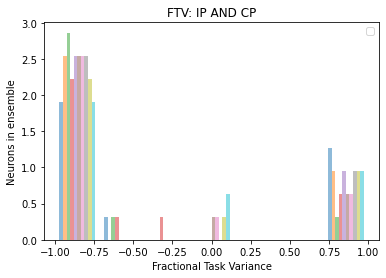

In [25]:

import os
import glob

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import scipy
import scipy.stats



#C:\Users\benso\Desktop\Projects\Neural_Reuse\Neural_Reuse_New\Combined\Sequential\Data
dir = "C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data"
files = glob.glob(os.path.join(dir, "perf_*.npy"))
#print(files)
files.sort()


all_FTV = []
n1 = []
n2 = []
n3 = []
n4 = []
n5 = []
n6 = []
n7 = []
n8 = []
n9 = []
n10 = []
for i, file in enumerate(files):
    fits = np.load(file)
    # if np.prod(fits) > 0.8:
    fits = fits**(1/4)
    if np.min(fits) > 0.8:
        ind = file.split("/")[-1].split(".")[-2].split("_")[-1]
        ipp = 1 - np.load("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data/NormVar_IP_" + str(ind) + ".npy") #size 10, 1 for each neuron
        cpp = 1 - np.load("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data/NormVar_CP_" + str(ind) + ".npy")
        lwp = 1 - np.load("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data/NormVar_LW_" + str(ind) + ".npy")
        mcp = 1 - np.load("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data/NormVar_MC_" + str(ind) + ".npy")

        ###########################################################################
        #Fractional Task variance for one agent#
        ###########################################################################
        FTV_ip_cp = []
        for ip,cp in zip(ipp,cpp):
            FTV_ip_cp.append((ip - cp)/(ip + cp)) #a FTV for neuron i that is -1 or 1 means that neuron is primarily selective in one of the tasks
        #print(FTV_ip_cp[0])
        n1.append(FTV_ip_cp[0])
        n2.append(FTV_ip_cp[1])
        n3.append(FTV_ip_cp[2])
        n4.append(FTV_ip_cp[3])
        n5.append(FTV_ip_cp[4])
        n6.append(FTV_ip_cp[5])
        n7.append(FTV_ip_cp[6])
        n8.append(FTV_ip_cp[7])
        n9.append(FTV_ip_cp[8])
        n10.append(FTV_ip_cp[9])
    

colors = ['gray', 'lightcoral', 'sienna', 'darkorange', 'yellow','lawngreen','lightseagreen','royalblue','blueviolet','deeppink']
names = ['neuron1', 'neuron2', 'neuron3', 'neuron4','neuron5','neuron6','neuron7','neuron8','neuron9','neuron10']

data = [n1,n2,n3,n4,n5,n6,n7,n8,n9,n10]
#plt.hist(data, bins = int(180/20),
#         color = colors, label=names)

plt.hist(data, 7, density=1, alpha=0.5)

# Plot formatting
plt.legend()
plt.xlabel('Fractional Task Variance')
plt.ylabel('Neurons in ensemble')
plt.title('FTV: IP AND CP')
plt.savefig("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Figures/FTV_IP_CP.png")
plt.show()

No handles with labels found to put in legend.


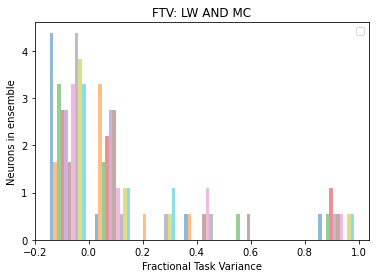

In [26]:

import os
import glob

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import scipy
import scipy.stats



#C:\Users\benso\Desktop\Projects\Neural_Reuse\Neural_Reuse_New\Combined\Sequential\Data
dir = "C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data"
files = glob.glob(os.path.join(dir, "perf_*.npy"))
#print(files)
files.sort()


all_FTV = []
n1 = []
n2 = []
n3 = []
n4 = []
n5 = []
n6 = []
n7 = []
n8 = []
n9 = []
n10 = []
for i, file in enumerate(files):
    fits = np.load(file)
    # if np.prod(fits) > 0.8:
    fits = fits**(1/4)
    if np.min(fits) > 0.8:
        ind = file.split("/")[-1].split(".")[-2].split("_")[-1]
        ipp = 1 - np.load("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data/NormVar_IP_" + str(ind) + ".npy") #size 10, 1 for each neuron
        cpp = 1 - np.load("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data/NormVar_CP_" + str(ind) + ".npy")
        lwp = 1 - np.load("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data/NormVar_LW_" + str(ind) + ".npy")
        mcp = 1 - np.load("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data/NormVar_MC_" + str(ind) + ".npy")

        ###########################################################################
        #Fractional Task variance for one agent#
        ###########################################################################
        FTV_ip_cp = []
        for lw,mc in zip(lwp,mcp):
            FTV_ip_cp.append((lw - mc)/(lw + mc)) #a FTV for neuron i that is -1 or 1 means that neuron is primarily selective in one of the tasks
        #print(FTV_ip_cp[0])
        n1.append(FTV_ip_cp[0])
        n2.append(FTV_ip_cp[1])
        n3.append(FTV_ip_cp[2])
        n4.append(FTV_ip_cp[3])
        n5.append(FTV_ip_cp[4])
        n6.append(FTV_ip_cp[5])
        n7.append(FTV_ip_cp[6])
        n8.append(FTV_ip_cp[7])
        n9.append(FTV_ip_cp[8])
        n10.append(FTV_ip_cp[9])
    

colors = ['gray', 'lightcoral', 'sienna', 'darkorange', 'yellow','lawngreen','lightseagreen','royalblue','blueviolet','deeppink']
names = ['neuron1', 'neuron2', 'neuron3', 'neuron4','neuron5','neuron6','neuron7','neuron8','neuron9','neuron10']

data = [n1,n2,n3,n4,n5,n6,n7,n8,n9,n10]
#plt.hist(data, bins = int(180/20),
#         color = colors, label=names)

plt.hist(data, 7, density=1, alpha=0.5)

# Plot formatting
plt.legend()
plt.xlabel('Fractional Task Variance')
plt.ylabel('Neurons in ensemble')
plt.title('FTV: LW AND MC')
plt.savefig("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Figures/FTV_LW_MC.png")
plt.show()

In [ ]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import scipy
import scipy.stats



#C:\Users\benso\Desktop\Projects\Neural_Reuse\Neural_Reuse_New\Combined\Sequential\Data
dir = "C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data"
files = glob.glob(os.path.join(dir, "perf_*.npy"))
#print(files)
files.sort()


all_FTV = []
n1 = []
n2 = []
n3 = []
n4 = []
n5 = []
n6 = []
n7 = []
n8 = []
n9 = []
n10 = []
for i, file in enumerate(files):
    fits = np.load(file)
    # if np.prod(fits) > 0.8:
    fits = fits**(1/4)
    if np.min(fits) > 0.8:
        ind = file.split("/")[-1].split(".")[-2].split("_")[-1]
        ipp = 1 - np.load("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data/NormVar_IP_" + str(ind) + ".npy") #size 10, 1 for each neuron
        cpp = 1 - np.load("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data/NormVar_CP_" + str(ind) + ".npy")
        lwp = 1 - np.load("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data/NormVar_LW_" + str(ind) + ".npy")
        mcp = 1 - np.load("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Data/NormVar_MC_" + str(ind) + ".npy")

        ###########################################################################
        #Fractional Task variance for one agent#
        ###########################################################################
        FTV_ip_cp = []
        for lw,mc in zip(lwp,mcp):
            FTV_ip_cp.append((lw - mc)/(lw + mc)) #a FTV for neuron i that is -1 or 1 means that neuron is primarily selective in one of the tasks
        #print(FTV_ip_cp[0])
        n1.append(FTV_ip_cp[0])
        n2.append(FTV_ip_cp[1])
        n3.append(FTV_ip_cp[2])
        n4.append(FTV_ip_cp[3])
        n5.append(FTV_ip_cp[4])
        n6.append(FTV_ip_cp[5])
        n7.append(FTV_ip_cp[6])
        n8.append(FTV_ip_cp[7])
        n9.append(FTV_ip_cp[8])
        n10.append(FTV_ip_cp[9])
    

colors = ['gray', 'lightcoral', 'sienna', 'darkorange', 'yellow','lawngreen','lightseagreen','royalblue','blueviolet','deeppink']
names = ['neuron1', 'neuron2', 'neuron3', 'neuron4','neuron5','neuron6','neuron7','neuron8','neuron9','neuron10']

data = [n1,n2,n3,n4,n5,n6,n7,n8,n9,n10]
#plt.hist(data, bins = int(180/20),
#         color = colors, label=names)

plt.hist(data, 7, density=1, alpha=0.5)

# Plot formatting
plt.legend()
plt.xlabel('Fractional Task Variance')
plt.ylabel('Neurons in ensemble')
plt.title('FTV: LW AND MC')
plt.savefig("C:/Users/benso/Desktop/Projects/Neural_Reuse/Neural_Reuse_New/Combined/Sequential/Figures/FTV_LW_MC.png")
plt.show()